# Treating Outliers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Loading a dataset from seaborn for demonstration

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df=sns.load_dataset('healthexp')

In [4]:
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [5]:
df.isnull().mean()*100

Year               0.0
Country            0.0
Spending_USD       0.0
Life_Expectancy    0.0
dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     274 non-null    float64
 3   Life_Expectancy  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB


### OUTLIER TREATMENT

#### BOXPLOT

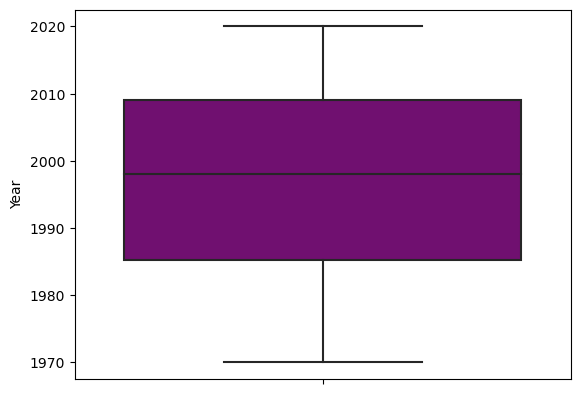

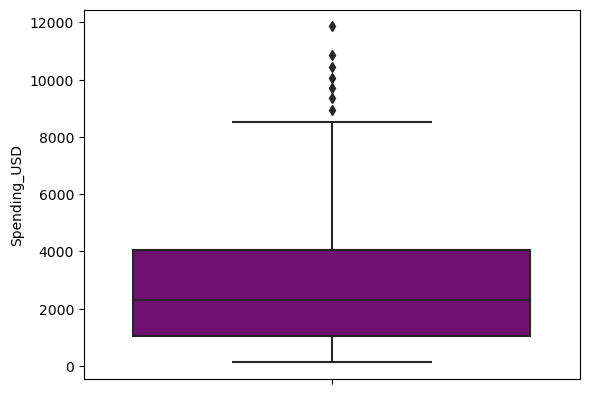

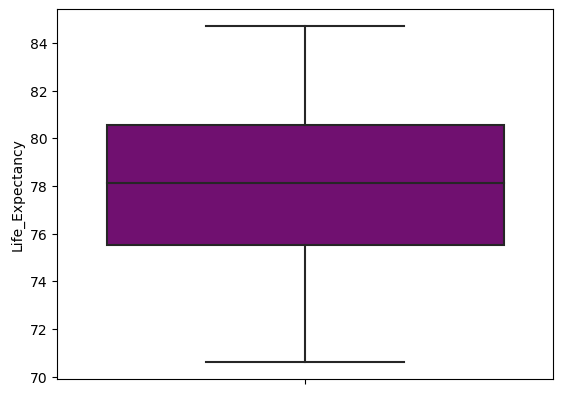

In [7]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.boxplot(y=df[i], color='purple')
        plt.show();

In [8]:
df.columns

Index(['Year', 'Country', 'Spending_USD', 'Life_Expectancy'], dtype='object')

#### Setting outlier limits

In [11]:
def outlier_limit(col):
    Q3,Q1 =np.nanpercentile (col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*Q1
    return UL,LL

In [12]:
for column in df.columns:
    if df[column].dtype !='object':
        UL,LL =outlier_limit(df[column])
        df[column]=np.where((df[column]>UL)| (df[column]<LL),np.nan,df[i])

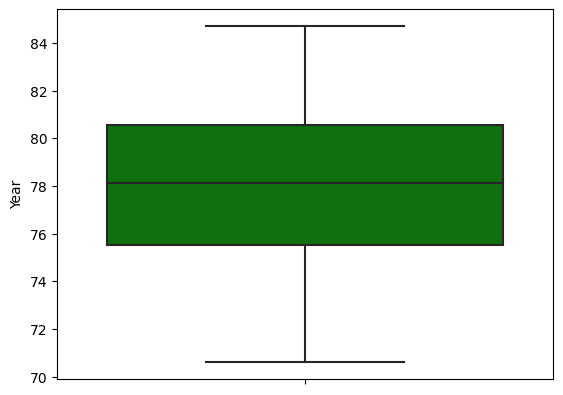

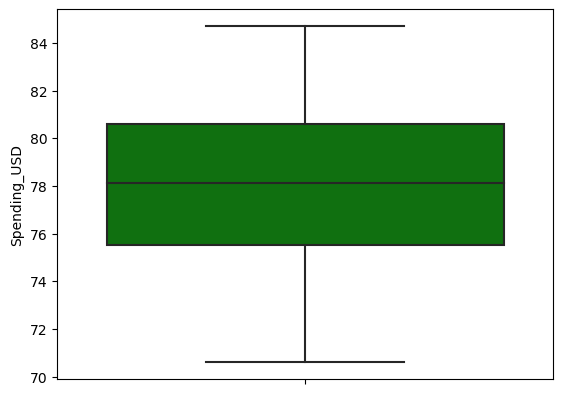

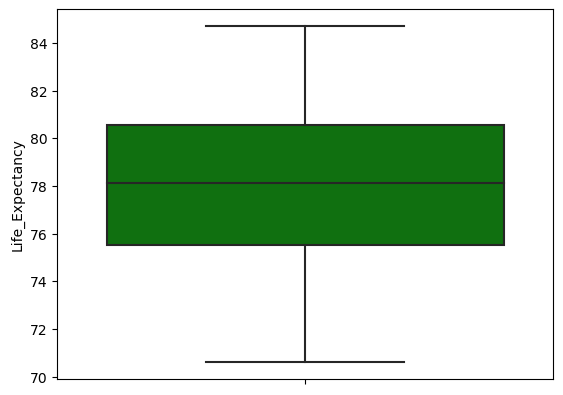

In [13]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.boxplot(y=df[i], color='green')
        plt.show();

In [18]:
df1=sns.load_dataset('diamonds')

In [19]:
df1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
